In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from darts import TimeSeries
from darts.dataprocessing.transformers import Scaler
from darts.models import NaiveSeasonal,NaiveDrift,TFTModel,NBEATSModel, TCNModel,TransformerModel
from darts.metrics import mape, rmse, r2_score
from darts.utils.statistics import check_seasonality, plot_acf
from darts.utils.timeseries_generation import datetime_attribute_timeseries

from darts.datasets import SunspotsDataset, AirPassengersDataset

import sys
import time
import warnings
warnings.filterwarnings("ignore")
import logging
logging.disable(logging.CRITICAL)

2022-04-26 13:34:02 prophet.plot ERROR: Importing plotly failed. Interactive plots will not work.


In [141]:
df = pd.read_csv("C:\\Users\\bduser\\Desktop\\Harsh_Thesis_work\\Bitcoin_price_with_sentiments.csv")

df.drop(['Unnamed: 0'],axis=1,inplace=True)

df['Price'] = df['Price'].str.replace(',','')
df['Price'] = df['Price'].astype('float')

df['Open'] = df['Open'].str.replace(',','')
df['Open'] = df['Open'].astype('float')

df['High'] = df['High'].str.replace(',','')
df['High'] = df['High'].astype('float')

df['Low'] = df['Low'].str.replace(',','')
df['Low'] = df['Low'].astype('float')


df['Vol.'] = df['Vol.'].astype(str)
for i in range(len(df['Vol.'])):
    if "K" in df['Vol.'][i]:
        df['Vol.'][i] = df['Vol.'][i].replace("K","")
        df['Vol.'][i] = float(df['Vol.'][i])
        df['Vol.'][i] =df['Vol.'][i]*1000

    elif "M" in df['Vol.'][i]:
        df['Vol.'][i] = df['Vol.'][i].replace("M","")
        df['Vol.'][i] = float(df['Vol.'][i])
        df['Vol.'][i] = df['Vol.'][i]*1000000

df['Vol.'] = df['Vol.'].astype(float)

df["Change %"] = df["Change %"].astype(str)
for i in range(len(df["Change %"])):
        df["Change %"][i] = df["Change %"][i].replace("%","")
df["Change %"] = df["Change %"].astype(float)

df['Date'] = pd.to_datetime(df['Date'])

df.set_index("Date",inplace=True)

df.sort_values(by='Date',inplace=True)

In [142]:
df.head()

,Price,Open,High,Low,Vol.,Change %,sentiment_scores
Date,,,,,,,
2018-01-01,"13,444.90","13,850.50","13,921.50","12,877.70","78,430.00",-2.93,0.07
2018-01-02,"14,754.10","13,444.90","15,306.10","12,934.20","137,730.00",9.74,0.06
2018-01-03,"15,156.60","14,754.10","15,435.00","14,579.70","106,540.00",2.73,0.04
2018-01-04,"15,180.10","15,156.50","15,408.70","14,244.70","110,970.00",0.15,0.06
2018-01-05,"16,954.80","15,180.10","17,126.90","14,832.40","141,960.00",11.69,0.05


In [143]:
df.isnull().sum()

Price               0
Open                0
High                0
Low                 0
Vol.                0
Change %            0
sentiment_scores    0
dtype: int64

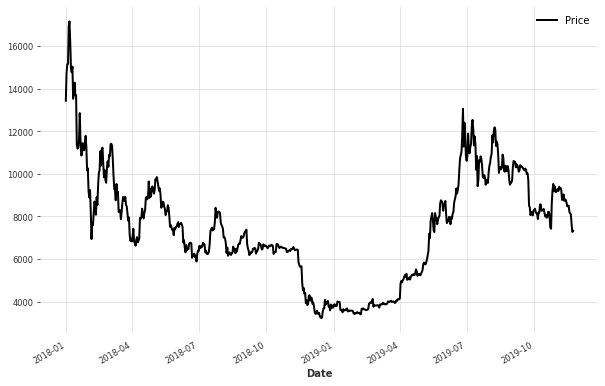

In [144]:
# create time series object for target variable
plt.figure(figsize=(10,6))
series = TimeSeries.from_series(df["Price"]) 
series.plot()

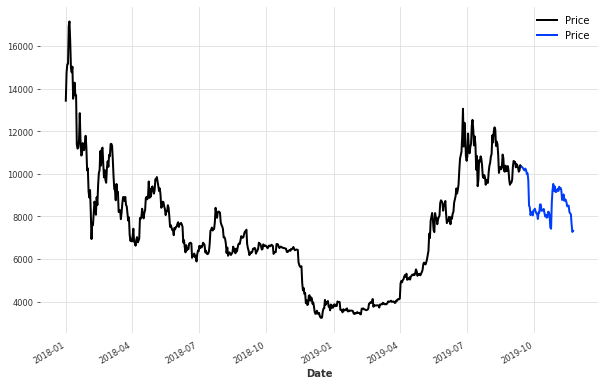

In [145]:
plt.figure(figsize=(10,6))
train, test = series.split_before(0.90)
train.plot()
test.plot()

# Data Preprocessing

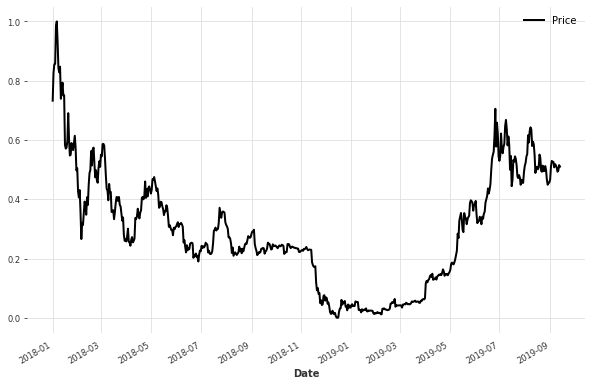

In [146]:
plt.figure(figsize=(10,6))
scaler = Scaler()
train_scaled = scaler.fit_transform(train)

train_scaled.plot()

In [147]:
#parameters = {
#     "input_chunk_length" : [30,100],
#     "output_chunk_length" : [10,30], 
    
# }

# best_model = model.gridsearch(parameters=parameters,series=train_scaled,forecast_horizon=30,start=0.7,stride=20
#                               ,last_points_only=False,metric=mape,reduction=np.mean)

# best_model.fit(train,epochs=50,verbose=True)
# best_model.forecast = best_model.predict(len(test))

In [148]:
# historical_fcast_theta = model.historical_forecasts(
#     series, start=0.7, forecast_horizon=14, stride=6, verbose=True
# )

# series.plot(label="data")
# historical_fcast_theta.plot(label="backtest 3-months ahead forecast (Theta)")
# print("MAPE = {:.2f}%".format(mape(historical_fcast_theta, series)))

In [149]:
df2 = df.copy()

df2 = df2.reset_index()

In [150]:
df2.head()

,Date,Price,Open,High,Low,Vol.,Change %,sentiment_scores
0,2018-01-01,"13,444.90","13,850.50","13,921.50","12,877.70","78,430.00",-2.93,0.07
1,2018-01-02,"14,754.10","13,444.90","15,306.10","12,934.20","137,730.00",9.74,0.06
2,2018-01-03,"15,156.60","14,754.10","15,435.00","14,579.70","106,540.00",2.73,0.04
3,2018-01-04,"15,180.10","15,156.50","15,408.70","14,244.70","110,970.00",0.15,0.06
4,2018-01-05,"16,954.80","15,180.10","17,126.90","14,832.40","141,960.00",11.69,0.05


In [151]:
df2.corr()

,Price,Open,High,Low,Vol.,Change %,sentiment_scores
Price,1.00,0.99,1.00,1.00,-0.18,0.05,0.40
Open,0.99,1.00,1.00,0.99,-0.19,-0.08,0.39
High,1.00,1.00,1.00,0.99,-0.18,-0.02,0.39
Low,1.00,0.99,0.99,1.00,-0.19,-0.00,0.41
Vol.,-0.18,-0.19,-0.18,-0.19,1.00,0.07,-0.07
Change %,0.05,-0.08,-0.02,-0.00,0.07,1.00,0.06
sentiment_scores,0.40,0.39,0.39,0.41,-0.07,0.06,1.00


In [152]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692 entries, 0 to 691
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              692 non-null    datetime64[ns]
 1   Price             692 non-null    float64       
 2   Open              692 non-null    float64       
 3   High              692 non-null    float64       
 4   Low               692 non-null    float64       
 5   Vol.              692 non-null    float64       
 6   Change %          692 non-null    float64       
 7   sentiment_scores  692 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 43.4 KB


In [153]:
# create time series object for target variable
ts_P = TimeSeries.from_series(df["Price"]) 

# check attributes of the time series
print("components:", ts_P.components)
print("duration:",ts_P.duration)
print("frequency:",ts_P.freq)
print("frequency:",ts_P.freq_str)
print("has date time index? (or else, it must have an integer index):",ts_P.has_datetime_index)
print("deterministic:",ts_P.is_deterministic)
print("univariate:",ts_P.is_univariate)

components: Index(['Price'], dtype='object', name='component')
duration: 691 days 00:00:00
frequency: <Day>
frequency: D
has date time index? (or else, it must have an integer index): True
deterministic: True
univariate: True


In [154]:
#df2.drop(['Price'],axis=1,inplace=True)
ts_covF = TimeSeries.from_dataframe(df2,'Date')

# check attributes of the time series
print("components (columns) of feature time series:", ts_covF.components)
print("duration:",ts_covF.duration)
print("frequency:",ts_covF.freq)
print("frequency:",ts_covF.freq_str)
print("has date time index? (or else, it must have an integer index):",ts_covF.has_datetime_index)
print("deterministic:",ts_covF.is_deterministic)
print("univariate:",ts_covF.is_univariate)

components (columns) of feature time series: Index(['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %', 'sentiment_scores'], dtype='object', name='component')
duration: 691 days 00:00:00
frequency: <Day>
frequency: D
has date time index? (or else, it must have an integer index): True
deterministic: True
univariate: False


In [14]:
# example: operating with time series objects:
# we can also create a 3-dimensional numpy array from a time series object
# 3 dimensions: time (rows) / components (columns) / samples
ar_covF = ts_covF.all_values()
print(type(ar_covF))
ar_covF.shape

<class 'numpy.ndarray'>


(692, 6, 1)

In [15]:
# example: operating with time series objects:
# we can also create a pandas series or dataframe from a time series object
df_covF = ts_covF.pd_dataframe()
type(df_covF)

pandas.core.frame.DataFrame

In [16]:
# train/test split and scaling of target variable
ts_train, ts_test = ts_P.split_after(0.9)
print("training start:", ts_train.start_time())
print("training end:", ts_train.end_time())
print("training duration:",ts_train.duration)
print("test start:", ts_test.start_time())
print("test end:", ts_test.end_time())
print("test duration:", ts_test.duration)


scalerP = Scaler()
scalerP.fit_transform(ts_train)
ts_ttrain = scalerP.transform(ts_train)
ts_ttest = scalerP.transform(ts_test)    
ts_t = scalerP.transform(ts_P)

# make sure data are of type float
ts_t = ts_t.astype(np.float32)
ts_ttrain = ts_ttrain.astype(np.float32)
ts_ttest = ts_ttest.astype(np.float32)

print("first and last row of scaled price time series:")
pd.options.display.float_format = '{:,.2f}'.format
ts_t.pd_dataframe().iloc[[0,-1]]

training start: 2018-01-01 00:00:00
training end: 2019-09-14 00:00:00
training duration: 621 days 00:00:00
test start: 2019-09-15 00:00:00
test end: 2019-11-23 00:00:00
test duration: 69 days 00:00:00
first and last row of scaled price time series:


component,Price
Date,
2018-01-01,0.73
2019-11-23,0.29


In [17]:
# train/test split and scaling of feature covariates
covF_train, covF_test = ts_covF.split_after(0.9)

scalerF = Scaler()
scalerF.fit_transform(covF_train)
covF_ttrain = scalerF.transform(covF_train) 
covF_ttest = scalerF.transform(covF_test)   
covF_t = scalerF.transform(ts_covF)  

# make sure data are of type float
covF_ttrain = covF_ttrain.astype(np.float32)
covF_ttest = covF_ttest.astype(np.float32)

pd.options.display.float_format = '{:.2f}'.format
print("first and last row of scaled feature covariates:")
covF_t.pd_dataframe().iloc[[0,-1]]

first and last row of scaled feature covariates:


component,Open,High,Low,Vol.,Change %,sentiment_scores
Date,,,,,,
2018-01-01,0.76,0.76,0.74,0.00,0.41,0.35
2019-11-23,0.29,0.29,0.30,0.05,0.52,0.87


In [18]:
covT = datetime_attribute_timeseries(series.time_index, attribute="day_of_week")
covT = covT.stack(  datetime_attribute_timeseries(covT.time_index, attribute="month")  )
covT = covT.stack(  datetime_attribute_timeseries(covT.time_index, attribute="year")  )
covT = covT.add_holidays(country_code="US")
covT = covT.astype(np.float32)


# train/test split
covT_train, covT_test = covT.split_after(ts_train.end_time())


# rescale the covariates: fitting on the training set
scalerT = Scaler()
scalerT.fit(covT_train)
covT_ttrain = scalerT.transform(covT_train)
covT_ttest = scalerT.transform(covT_test)
covT_t = scalerT.transform(covT)

covT_t = covT_t.astype(np.float32)


pd.options.display.float_format = '{:.0f}'.format
print("first and last row of unscaled time covariates:")
covT.pd_dataframe().iloc[[0,-1]]

first and last row of unscaled time covariates:


component,day_of_week,month,year,holidays
Date,,,,
2018-01-01,0,1,2018,1
2019-11-23,5,11,2019,0


In [19]:
# combine feature and time covariates along component dimension: axis=1
ts_cov = ts_covF.concatenate( covT.slice_intersect(ts_covF), axis=1 )                      # unscaled F+T
cov_t = covF_t.concatenate( covT_t.slice_intersect(covF_t), axis=1 )                       # scaled F+T
cov_ttrain = covF_ttrain.concatenate( covT_ttrain.slice_intersect(covF_ttrain), axis=1 )   # scaled F+T training set
cov_ttest = covF_ttest.concatenate( covT_ttest.slice_intersect(covF_ttest), axis=1 )       # scaled F+T test set


pd.options.display.float_format = '{:.2f}'.format
print("first and last row of unscaled covariates:")
ts_cov.pd_dataframe().iloc[[0,-1]]

first and last row of unscaled covariates:


component,Open,High,Low,Vol.,Change %,sentiment_scores,day_of_week,month,year,holidays
Date,,,,,,,,,,
2018-01-01,13850.50,13921.50,12877.70,78430.00,-2.93,0.07,0.00,1.00,2018.00,1.00
2019-11-23,7271.60,7342.50,7093.70,783180.00,0.71,0.14,5.00,11.00,2019.00,0.00


In [20]:
pd.options.display.float_format = '{:.2f}'.format
print("first and last row of scaled covariates, training + test set:")
cov_t = cov_t.astype(np.float32)
cov_t.pd_dataframe().iloc[[0,1,2,3,4,-1]]

first and last row of scaled covariates, training + test set:


component,Open,High,Low,Vol.,Change %,sentiment_scores,day_of_week,month,year,holidays
Date,,,,,,,,,,
2018-01-01,0.76,0.76,0.74,0.00,0.41,0.35,0.00,0.00,0.00,1.00
2018-01-02,0.73,0.86,0.74,0.00,0.78,0.27,0.17,0.00,0.00,0.00
2018-01-03,0.83,0.87,0.87,0.00,0.58,0.20,0.33,0.00,0.00,0.00
2018-01-04,0.86,0.87,0.84,0.00,0.50,0.28,0.50,0.00,0.00,0.00
2018-01-05,0.86,0.99,0.89,0.01,0.84,0.22,0.67,0.00,0.00,0.00
2019-11-23,0.29,0.29,0.30,0.05,0.52,0.87,0.83,0.91,1.00,0.00


In [21]:
pd.options.display.float_format = '{:.2f}'.format
print("first and last row of scaled covariates, training + test set:")
#cov_t.pd_dataframe().iloc[[0,-1]]
cov_t.pd_dataframe().info

first and last row of scaled covariates, training + test set:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 692 entries, 2018-01-01 to 2019-11-23
Freq: D
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Open              692 non-null    float32
 1   High              692 non-null    float32
 2   Low               692 non-null    float32
 3   Vol.              692 non-null    float32
 4   Change %          692 non-null    float32
 5   sentiment_scores  692 non-null    float32
 6   day_of_week       692 non-null    float32
 7   month             692 non-null    float32
 8   year              692 non-null    float32
 9   holidays          692 non-null    float32
dtypes: float32(10)
memory usage: 32.4 KB


In [55]:
cov_t.pd_dataframe().corr()

component,Open,High,Low,Vol.,Change %,sentiment_scores,day_of_week,month,year,holidays
component,,,,,,,,,,
Open,1.00,1.00,0.99,-0.19,-0.08,0.39,-0.01,-0.05,-0.04,0.01
High,1.00,1.00,0.99,-0.18,-0.02,0.39,-0.01,-0.06,-0.04,0.01
Low,0.99,0.99,1.00,-0.19,-0.00,0.41,-0.00,-0.03,-0.02,0.02
Vol.,-0.19,-0.18,-0.19,1.00,0.07,-0.07,-0.03,0.10,0.02,-0.04
Change %,-0.08,-0.02,-0.00,0.07,1.00,0.06,0.03,-0.04,0.07,-0.00
sentiment_scores,0.39,0.39,0.41,-0.07,0.06,1.00,-0.01,0.07,0.73,-0.03
day_of_week,-0.01,-0.01,-0.00,-0.03,0.03,-0.01,1.00,0.01,0.00,-0.18
month,-0.05,-0.06,-0.03,0.10,-0.04,0.07,0.01,1.00,-0.09,0.02
year,-0.04,-0.04,-0.02,0.02,0.07,0.73,0.00,-0.09,1.00,-0.02


In [22]:
MSEAS = 90          # max seasonality to check: days
ALPHA = 0.05        # significance level for seasonality test
FIGSIZE = (9, 6)


In [23]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
import logging
logging.disable(logging.CRITICAL)





pd.set_option("display.precision",2)
np.set_printoptions(precision=2, suppress=True)
pd.options.display.float_format = '{:,.2f}'.format

In [24]:
# check for seasonality, via ACF
mseas=MSEAS
for m in range(2, MSEAS):
    is_seasonal, mseas = check_seasonality(series, m=m, alpha=ALPHA, max_lag=MSEAS)
    if is_seasonal:
        break

print("seasonal? " + str(is_seasonal))
if is_seasonal:
    print('There is seasonality of order {} days'.format(mseas))

seasonal? True
There is seasonality of order 36 days


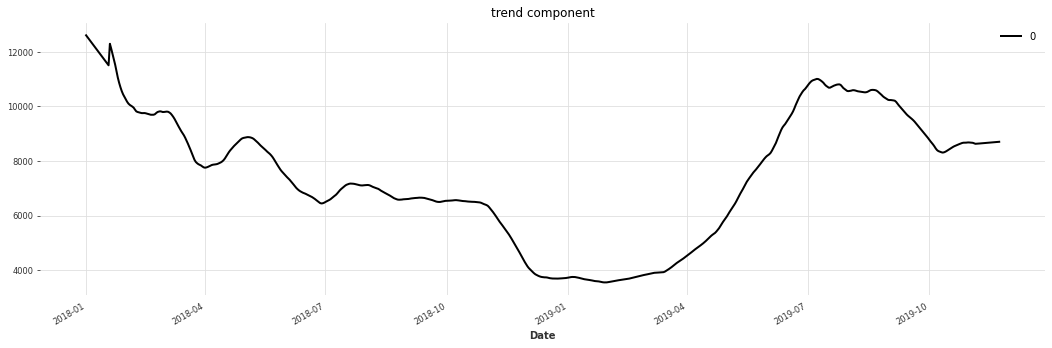

In [25]:
# ETS analysis: try to discern trend and seasonal components
ts_trend, ts_seas = extract_trend_and_seasonality(ts=series, freq=mseas)

plt.figure(100, figsize=(18, 5))
ts_trend.plot()
plt.title("trend component");

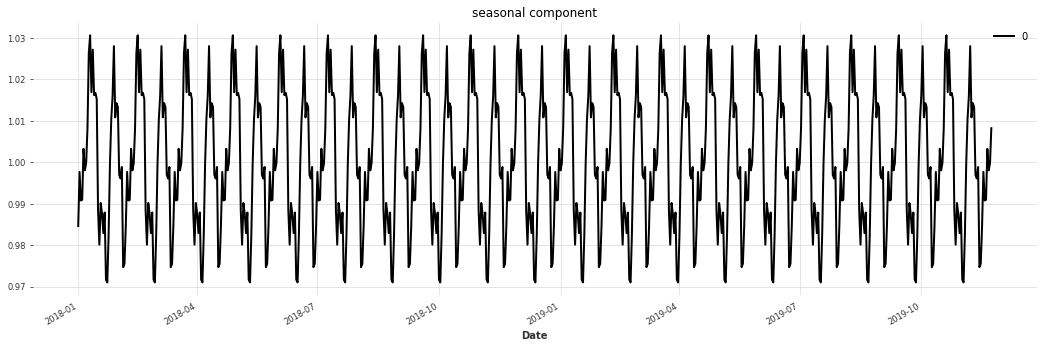

In [26]:
plt.figure(100, figsize=(18, 5))
ts_seas.plot()
plt.title("seasonal component");

# Naive Baseline Forecast

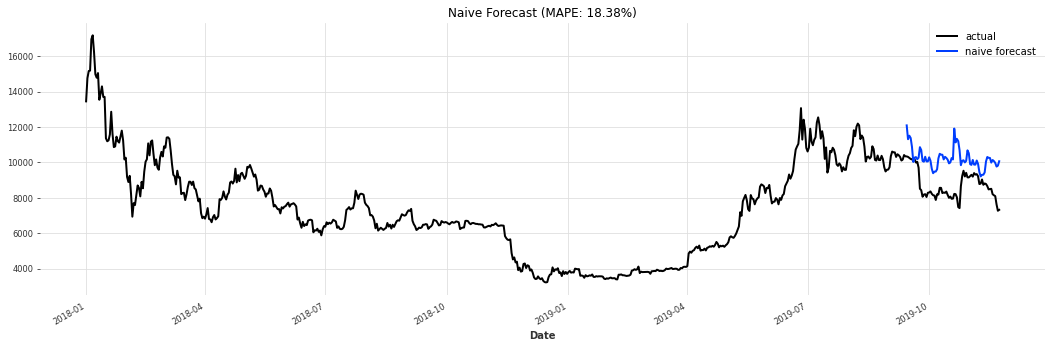

In [27]:
# naive seasonal forecast
modelNs = NaiveSeasonal(K=36)
modelNs.fit(train)
ts_predNs = modelNs.predict(len(test))

# naive drift (trend) forecast
modelNd = NaiveDrift()
modelNd.fit(train)
ts_predNd = modelNd.predict(len(test))

ts_predN = ts_predNd + ts_predNs - ts_train.last_value()

plt.figure(100, figsize=(18, 5))
series.plot(label="actual")
ts_predN.plot(label="naive forecast")
plt.title("Naive Forecast (MAPE: {:.2f}%)".format(mape(test, ts_predN)))
plt.legend()

# Exponential Smoothing

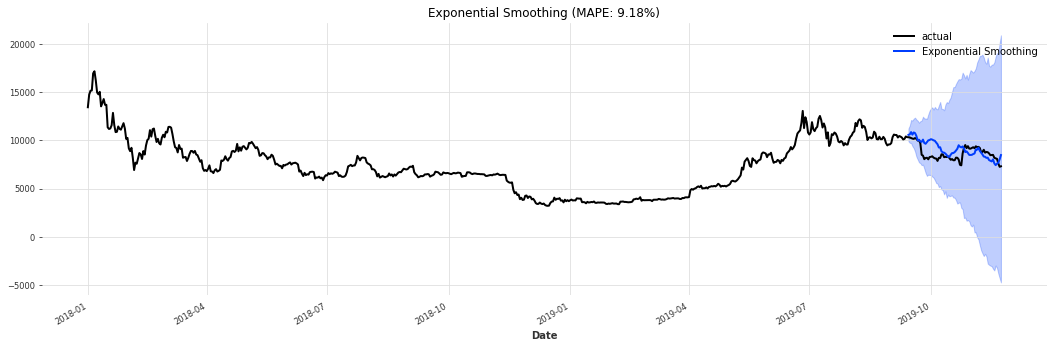

In [28]:
modelX = ExponentialSmoothing(
                seasonal_periods=36, 
                seasonal=ModelMode.MULTIPLICATIVE)
modelX.fit(train)
ts_predX = modelX.predict(  n=len(test), 
                            num_samples=100)

plt.figure(100, figsize=(18, 5))
series.plot(label="actual")
ts_predX.plot(label="Exponential Smoothing")
plt.title("Exponential Smoothing (MAPE: {:.2f}%)".format(mape(test, ts_predX)))
plt.legend();

# TFT Model

In [29]:
model = TFTModel(   input_chunk_length=30,
                    output_chunk_length=1,
                    hidden_size=64,
                    lstm_layers=1,  #LSTMLAYERS,
                    num_attention_heads=1,
                    dropout=0.1,
                    batch_size=64,
                    n_epochs=100,
                    #likelihood=QuantileRegression(quantiles=QUANTILES), 
                    random_state=42, 
                    force_reset=True,
                 torch_device_str ="cuda")

In [30]:
# training
model.fit(  ts_ttrain, 
            future_covariates=cov_t, 
            verbose=True)

Training: 0it [00:00, ?it/s]

In [31]:
# testing: generate predictions
ts_tpred = model.predict(   n=len(ts_ttest), 
                            num_samples=100,   
                            n_jobs=3)

Predicting: 10it [00:00, ?it/s]

In [32]:
print("Do the predictions constitute a probabilistic time series?", ts_tpred.is_probabilistic)

Do the predictions constitute a probabilistic time series? True


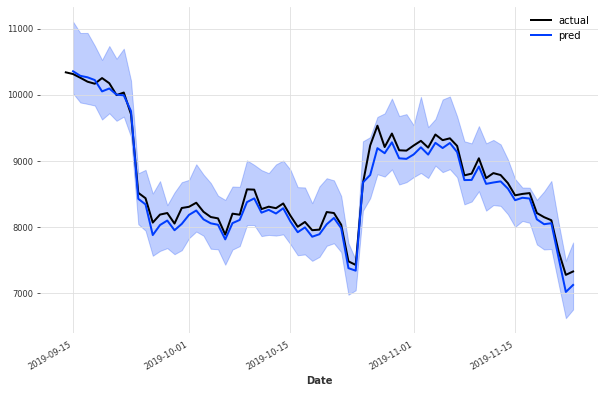

In [33]:
# testing: call helper function: plot predictions
ts_pred = scaler.inverse_transform(ts_tpred)

plt.figure(figsize=(10, 6))
    
test.plot(label="actual")  
ts_pred.plot(label="pred")

In [34]:
from darts.metrics import mape,mae,rmse

mape_error = mape(test,ts_pred)
rmse_error = rmse(test,ts_pred)
mae_error = mae(test,ts_pred)
print("MAPE:",mape_error)
print("rmse:",rmse_error)
print("mae:", mae_error)

MAPE: 1.273494561294498
rmse: 128.98397657013996
mae: 109.14675502232136


# Temporal Convolutional Network

In [35]:
from darts.models import TCNModel
#30 day window
EPOCH = 100    
FC_N = 30               # forecast periods
FC_STRIDE = 10
DROP = 0.1
LEARN = 0.001

model_TCN = TCNModel(
        input_chunk_length=FC_N,
        output_chunk_length=1, 
        n_epochs=EPOCH,
        dropout=DROP,
        dilation_base=2,
        weight_norm=True,
        batch_size=16,
        kernel_size=5,
        num_filters=3,
        optimizer_kwargs={'lr': LEARN},
        log_tensorboard=True,
        force_reset=True,
        random_state=42)

In [36]:
# training: load a saved model or (re)train
model_TCN.fit(  series=ts_ttrain, 
            past_covariates=cov_t,
                val_series=ts_ttest,  
          val_past_covariates=cov_t,
                verbose=True)

Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

In [37]:
# testing: generate predictions
TCN_ts_tpred = model_TCN.predict(   n=len(ts_ttest),  
                            past_covariates=cov_t, 
                            verbose=True)

Predicting: 37it [00:00, ?it/s]

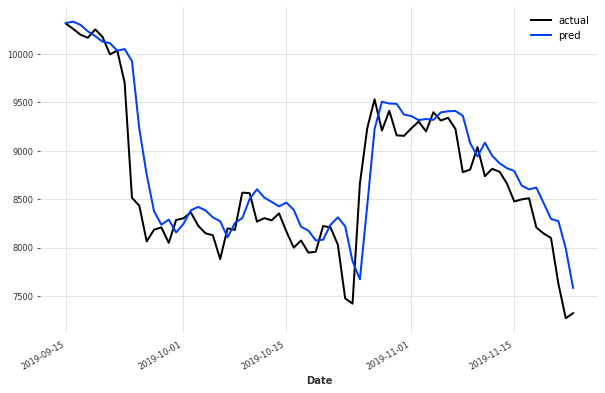

In [38]:
pred = scaler.inverse_transform(TCN_ts_tpred)
actual = scaler.inverse_transform(ts_ttest)

plt.figure(figsize=(10, 6))
actual.plot(label="actual")
pred.plot(label="pred")

In [39]:
mape_error = mape(actual,pred)
rmse_error = rmse(actual,pred)
mae_error = mae(actual,pred)
print("MAPE:",mape_error)
print("rmse:",rmse_error)
print("mae:", mae_error)

MAPE: 3.060733526945114
rmse: 361.75
mae: 256.37766


In [40]:
#TCN model with window size 7
model_TCN_2 = TCNModel(
        input_chunk_length=7,
        output_chunk_length=1, 
        n_epochs=EPOCH,
        dropout=DROP,
        dilation_base=2,
        weight_norm=True,
        batch_size=16,
        kernel_size=5,
        num_filters=3,
        optimizer_kwargs={'lr': LEARN},
        log_tensorboard=True,
        force_reset=True,
        random_state=42)

In [41]:
# training: load a saved model or (re)train
model_TCN_2.fit(  series=ts_ttrain, 
            past_covariates=cov_t,
                val_series=ts_ttest,  
          val_past_covariates=cov_t,
                verbose=True)

Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

In [42]:
# testing: generate predictions
TCN_2_ts_tpred = model_TCN_2.predict(   n=len(ts_ttest),  
                            past_covariates=cov_t, 
                            verbose=True)

Predicting: 39it [00:00, ?it/s]

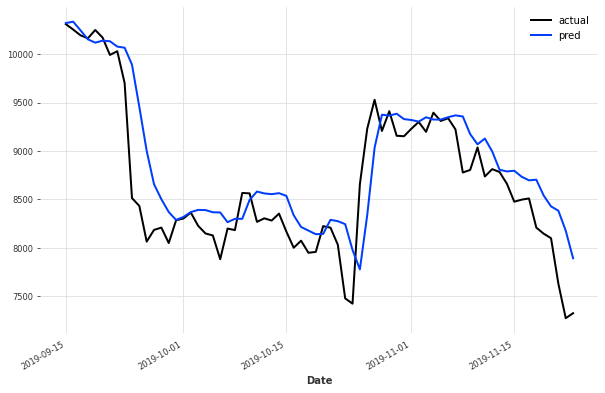

In [43]:
pred = scaler.inverse_transform(TCN_2_ts_tpred)
actual = scaler.inverse_transform(ts_ttest)

plt.figure(figsize=(10, 6))
actual.plot(label="actual")
pred.plot(label="pred")

In [44]:
mape_error = mape(actual,pred)
rmse_error = rmse(actual,pred)
mae_error = mae(actual,pred)
print("MAPE:",mape_error)
print("rmse:",rmse_error)
print("mae:", mae_error)

MAPE: 3.4834295511245728
rmse: 406.7398
mae: 289.645


# NBEATS Model

In [45]:
#NBEATSModel - 7 day window
NBEATS_model = NBEATSModel(    input_chunk_length=7,
                        output_chunk_length=1, 
                        num_stacks=32,
                        layer_widths=16,
                        batch_size=64,
                        n_epochs=100,
                        nr_epochs_val_period=1,  
                        log_tensorboard=True,
                        generic_architecture=True, 
                        random_state=42,
                        force_reset=True,
                        save_checkpoints=True,
                        torch_device_str="cuda"
                    )

In [46]:
# training: load a saved model or (re)train
NBEATS_model.fit(  series=ts_ttrain, 
            past_covariates=cov_t,
                val_series=ts_ttest,  
          val_past_covariates=cov_t,
                verbose=True)

Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

In [47]:
# testing: generate predictions
ts_tpred = NBEATS_model.predict(   n=len(ts_ttest),  
                            past_covariates=cov_t, 
                            verbose=True)

Predicting: 10it [00:00, ?it/s]

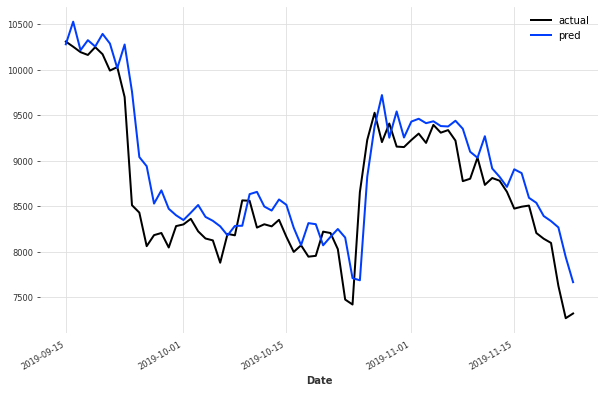

In [48]:
pred = scaler.inverse_transform(ts_tpred)
actual = scaler.inverse_transform(ts_ttest)

plt.figure(figsize=(10, 6))
actual.plot(label="actual")
pred.plot(label="pred")

In [49]:
mape_error = mape(actual,pred)
rmse_error = rmse(actual,pred)
mae_error = mae(actual,pred)
print("MAPE:",mape_error)
print("rmse:",rmse_error)
print("mae:", mae_error)

MAPE: 3.351040929555893
rmse: 370.6418
mae: 282.1408


In [50]:
#NBEATSModel - 30 day window
NBEATS_model_30 = NBEATSModel(    input_chunk_length=30,
                        output_chunk_length=1, 
                        num_stacks=32,
                        layer_widths=16,
                        batch_size=64,
                        n_epochs=100,
                        nr_epochs_val_period=1,  
                        log_tensorboard=True,
                        generic_architecture=True, 
                        random_state=42,
                        force_reset=True,
                        save_checkpoints=True,
                        torch_device_str="cuda"
                    )

In [51]:
# training: load a saved model or (re)train
NBEATS_model_30.fit(  series=ts_ttrain, 
            past_covariates=cov_t,
                val_series=ts_ttest,  
          val_past_covariates=cov_t,
                verbose=True)

Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

In [52]:
# testing: generate predictions
ts_tpred_30 = NBEATS_model_30.predict(   n=len(ts_ttest),  
                            past_covariates=cov_t, 
                            verbose=True)

Predicting: 10it [00:00, ?it/s]

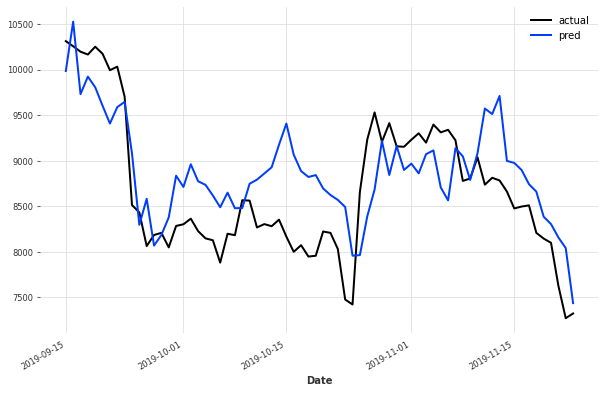

In [53]:
pred = scaler.inverse_transform(ts_tpred_30)
actual = scaler.inverse_transform(ts_ttest)

plt.figure(figsize=(10, 6))
actual.plot(label="actual")
pred.plot(label="pred")

In [54]:
mape_error = mape(actual,pred)
rmse_error = rmse(actual,pred)
mae_error = mae(actual,pred)
print("MAPE:",mape_error)
print("rmse:",rmse_error)
print("mae:", mae_error)

MAPE: 5.4858531802892685
rmse: 544.2699
mae: 466.6752


In [2]:
dataset = pd.read_csv("timeseries_April24.csv")

In [4]:
dataset.drop(['new_senti'],axis=1,inplace=True)

In [6]:
dataset.to_csv("Price_dataset.csv")